# Introduction To Data Science – Assignment 2

---

#### Sections A – B – C – D

---

##***Instructions: Read These Carefully Before Starting!***

1. Due Date: Thursday 20th October 2022 – 11:59PM

2. **Name the file in the format Lyyxxxx_A2.ipynb and save it as .ipynb (e.g. L216666_A2.ipynb)**

3. Submission will be taken on Google Classroom (**submit SINGLE .ipynb file ONLY**)

4. **Assignment will not be evaluated if**:

> * You submit python (.py) files
> * You submit multiple .ipynb files
> * You submit compressed (.rar or .zip) files

5. **Work in the spaces provided and do not delete/modify any cells from this template.**

6. Upload data files directly to Google Colab - do not use Google Drive or GitHub linking method

*Not following these instructions will lead to mark deduction.*

---

All source files needed to complete this assignment can be found on the following [Google Drive link](https://drive.google.com/drive/folders/1qBib_6ZOhvHb73ZRLWiCMWl9NFyU1IDO?usp=sharing). Download these files and upload them to your Google Colab Notebook. 

**Do not link Google Drive or GitHub with Colab.**

**Do not add these files with your submission on Google Classroom.**

---

Happy Coding 🌺

---

TA Emails

Section A, C - Muhammad Maarij l192347@lhr.nu.edu.pk

Section B, D - Hira Ijaz l192377@lhr.nu.edu.pk

---

---
## Question 0

Add all library imports here

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('FactoryRevenue.csv')

---
## Question 1

####Single Linear Regression with Gradient Descent

> Take help from slides 26 and 30
---

**Part A -**
Write a function that calculates and returns value for hypothesis $h_\theta(x)$

In [ ]:
# complete this function implementation
def hypothesis(x, theta):
  return theta[0] + theta[1]*x

**Part B -**
Write a function that calculates and returns value for loss/cost $J(\theta_0, \theta_1)$

In [ ]:
# complete this function implementation
def loss(hypothesis_x, y):
  return (1/2*m) * np.sum((hypothesis_x - y)**2)

**Part C-**
Write a function that applies the gradient descent algorithm and updates values of $\theta_0$ and $\theta_1$ until they converge.

* take default vaue of $α$ to be 0.015
* take default number of iterations to be 15000
* print loss after every 500 iterations

In [ ]:
# complete this function implementation
m = df.shape[0]
def gradientDescent(x, y, theta, numIterations=30, alpha=0.015):
  i = 0
  while i < numIterations:
      y_predicted = hypothesis(x, theta)
      theta[0] -= 1/m * alpha * sum(y_predicted-y)
      theta[1] -= 1/m * alpha * sum((y_predicted-y) * x)
      i+=1
      print(theta[0], theta[1])
      if i%500==0:
        print(loss(y_predicted, y))

**Part D -**
FactoryRevenue.csv contains information about the number of workers in a factory and the annual profit for that factory. Import the file FactoryRevenue.csv as a Pandas DataSet and print out the information for it.

In [ ]:
df = pd.read_csv('FactoryRevenue.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TotalFactoryWorkers  98 non-null     float64
 1   AnnualProfit         98 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB
None


**Part E -**
Remove rows that have any null values

In [ ]:
df.dropna(inplace=True)

**Part F -**

First identify the independant and dependant variables. 

Then create two arrays named x and y and add independant variable data to array x, dependant variable data to array y.

In [ ]:
# independant variable: Total Factory Workers
# dependant variable: Annual Profit

**Part G -** 

Create an array called 'theta' that will hold $θ_0$ and $θ_1$. Initalize both values to 0.

Then call the gradientDescent function using array x, array y, and array theta. Do not provide any other input parameters.

Print out the values of y-intercept and slope/gradient

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('FactoryRevenue.csv')
theta=[0,0]

x= df["TotalFactoryWorkers"]
y= df["AnnualProfit"]

gradientDescent(x,y,theta)

nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


**Part H -** Plot a scatter plot and regression line on the same graph

In [ ]:
# import matplotlib.pyplot as plt
# plt.scatter(x,y,color='red')
# y=a*x+b

# plt.plot(x,y)

---
## Question 2

Logistic Regression on Flowers Dataset

---



**Part A** - Load the file FlowersData.csv and describe the dataset

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('FlowersData.csv')
df.dropna(inplace=True)
perc =[.20, .40, .60, .80]
inc =['object', 'float', 'int']
desc=df.describe(percentiles=perc,include=inc)
desc

,sepal_length,sepal_width,petal_length,petal_width,flower_name
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,hibiscus
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
20%,5.000000,2.700000,1.500000,0.200000,NaN
40%,5.600000,3.000000,3.900000,1.160000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN


**Part B** - Split data into training and test data using SKLearn train_test_split. Specify parameter test_size to be 25%

Hint: You will be needing 4 arrays: X_train, X_test, y_train, y_test

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('FlowersData.csv')
df.dropna(inplace=True)

X=df[df.columns[0:4]]
y=df['flower_name']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train.dropna(inplace=True)
X_test.dropna(inplace=True)



X_train shape: (112, 4)
X_test shape: (38, 4)
y_train shape: (112,)
y_test shape: (38,)


**Part C** - Perform scaling on the X_test and X_train values using StandardScacler from SKLearn Library

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)
X_train
X_test

array([[-0.93347961,  0.5713672 , -1.1577969 , -1.17892675],
       [ 0.38030651, -0.34282032,  0.74535017,  0.80663409],
       [-1.19623683, -0.11427344, -1.1577969 , -1.30302431],
       [-1.06485822, -2.62828914, -0.03829863, -0.18614633],
       [-0.40796516,  0.79991408, -1.26974673, -1.17892675],
       [-0.93347961,  1.48555473, -1.1577969 , -1.0548292 ],
       [-0.93347961,  0.79991408, -1.21377182, -1.17892675],
       [ 0.11754928,  0.11427344,  0.68937526,  0.80663409],
       [ 0.11754928, -0.34282032,  0.8573    ,  0.80663409],
       [-1.32761544, -0.34282032, -1.21377182, -1.30302431],
       [-1.32761544,  0.5713672 , -1.10182199, -1.17892675],
       [-0.01382933,  1.94264849, -1.32572165, -1.17892675],
       [-0.01382933, -1.02846097,  0.29755086, -0.18614633],
       [ 0.51168512, -0.5713672 ,  0.40950069,  0.18614633],
       [ 1.4313354 , -0.11427344,  0.74535017,  0.43434144],
       [ 1.56271401,  0.11427344,  0.63340034,  0.31024388],
       [ 0.64306373, -0.

**Part D** - Train Model using SKLearn LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as df
import numpy as np
logreg=LogisticRegression()

logreg.fit(X_train,y_train)

LogisticRegression()

**Part E** - Predict Labels for test split

In [ ]:
y_pred = logreg.predict(X_test)
y_pred

array(['hibiscus', 'lily', 'hibiscus', 'daffodil', 'hibiscus', 'hibiscus',
       'hibiscus', 'lily', 'lily', 'hibiscus', 'hibiscus', 'hibiscus',
       'daffodil', 'daffodil', 'daffodil', 'daffodil', 'lily', 'lily',
       'lily', 'lily', 'daffodil', 'hibiscus', 'hibiscus', 'daffodil',
       'lily', 'lily', 'hibiscus', 'hibiscus', 'lily', 'lily', 'hibiscus',
       'lily', 'hibiscus', 'lily', 'lily', 'hibiscus', 'daffodil', 'lily'],
      dtype=object)

---
## Question 3

Confusion Matrix Construction

---

**Part A** - Using the prediction result of logistic regression (Question 2) construct a confusion matrix using SKLearn confusion_matrix

Print out this confusion matrix

Text(0.5, 15.0, 'Predicted label')

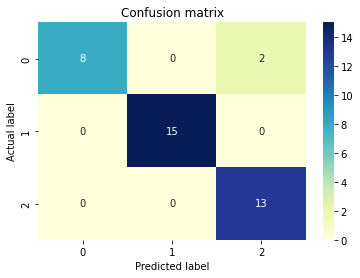

In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Part B** - Calculate and print Accuracy

In [ ]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.9333333333333332

**Part C** - Calculate and print Recall

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred,average=None)

array([0.8, 1. , 1. ])

**Part D** - Calculate and print Precision

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred,average=None)


array([1.        , 1.        , 0.86666667])

**Part E** - Calculate and print $𝐹_1$ Score

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average=None)

array([0.88888889, 1.        , 0.92857143])